In [1]:
"""Matrici e norme
Exercise 1.1. Si consideri la matrice A

    A =([[1, 2], [0.499, 1.001]])

• Calcolare la norma 1, la norma 2, la norma Frobenius e la norma infinito di A con 
numpy.linalg.norm() (guardare l’help della funzione)."""

import numpy as np
import sys
#help(np.linalg) # View source
#help (np.linalg.norm)
#help (np.linalg.cond)

n = 2
A = np.array([[1, 2], [0.499, 1.001]])
print ('Norme di A:')
norm1 = np.linalg.norm(A,1)
norm2 = np.linalg.norm(A,2)
normfro = np.linalg.norm(A,'fro')
norminf = np.linalg.norm(A,np.inf)

print('Norma1 = ', norm1, '\n')
print('Norma2 = ', norm2, '\n')
print('Normafro = ', normfro, '\n')
print('Norma infinito = ', norminf, '\n')

Norme di A:
Norma1 =  3.001 

Norma2 =  2.500200104037774 

Normafro =  2.5002003919686118 

Norma infinito =  3.0 



In [2]:
"""• Calcolare il numero di condizionamento di A con numpy.linalg.cond() 
(guardare l’help della funzione).
"""

cond1 = np.linalg.cond(A, 1)
cond2 = np.linalg.cond(A, 2)
condfro = np.linalg.cond(A, 'fro')
condinf = np.linalg.cond(A, np.inf)

print ('K(A)_1 = ', cond1, '\n')
print ('K(A)_2 = ', cond2, '\n')
print ('K(A)_fro =', condfro, '\n')
print ('K(A)_inf =', condinf, '\n')

K(A)_1 =  3001.0000000001082 

K(A)_2 =  2083.666853410337 

K(A)_fro = 2083.6673333334084 

K(A)_inf = 3001.0000000001082 



In [3]:
"""• Considerare il vettore colonna x = (1, 1)T
e calcolare il corrispondente termine noto b per il sistema
lineare Ax = b."""

#x = np.array([[1], [1]])
x = np.ones((2, 1))
#x = np.array([[1, 1]]).T
# Ax = b
b = A.dot(x)
print ('b=',b,'\n')

b= [[3. ]
 [1.5]] 



In [4]:
"""
• Considerare ora il vettore ˜b = (3, 1.4985)T
e verifica che ˜x = (2, 0.5)T `e soluzione del sistema Ax˜ = ˜b"""

btilde = np.array([[3], [1.4985]])
#xtilde = np.array([[2], [0.5]])
xtilde = np.array([[2, 0.5]]).T

# Verificare che xtilde è soluzione di A xtilde = btilde
# A * xtilde = btilde
print ('A*xtilde = ', A.dot(xtilde) , '\n')

A*xtilde =  [[3.    ]
 [1.4985]] 



In [5]:
"""
• Calcolare la norma 2 della perturbazione sui termini noti ∆b = ∥b−˜b∥2 e la norma 2 della perturbazione
sulle soluzioni ∆x = ∥x − x˜∥2. Confrontare ∆b con ∆x."""

deltax = np.linalg.norm(x-xtilde, ord=2)
deltab = np.linalg.norm(b-btilde, ord=2)

print ('delta x = ', deltax)
print ('delta b = ', deltab)

delta x =  1.118033988749895
delta b =  0.0015000000000000568


In [6]:
##################################################
##################################################
##################################################
##################################################

"""Metodi diretti
Exercise 2.1. Si consideri la matrice
    A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ])
• Creare il problema test in cui il vettore della soluzione esatta è x = (1, 1, 1, 1)T
e il vettore termine noto è b = Ax.
• Guardare l’help del modulo scipy.linalg.decomp lu e usare una delle sue funzioni per calcolare la
fattorizzazione LU di A con pivoting. Verificare la correttezza dell’output.
    """

import scipy
# help (scipy)
import scipy.linalg
# help (scipy.linalg)
import scipy.linalg.decomp_lu as LUdec 
from scipy.linalg import lu, solve_triangular

# help (LUdec)
# help(scipy.linalg.lu_solve )

# crazione dati e problema test
A = np.array ([ [3,-1, 1,-2], [0, 2, 5, -1], [1, 0, -7, 1], [0, 2, 1, 1]  ])
#vettore termine noto b
b = np.dot(A, np.array([1, 1, 1, 1]))

# Calcola la fattorizzazione LU di A con pivoting
P, L, U = lu(A)

# Verifica la correttezza dell'output
print("Matrice P (matrice di permutazione):")
print(P)
print("Matrice L (matrice triangolare inferiore):")
print(L)
print("Matrice U (matrice triangolare superiore):")
print(U)

Matrice P (matrice di permutazione):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Matrice L (matrice triangolare inferiore):
[[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.33333333 0.16666667 1.         0.        ]
 [0.         1.         0.48979592 1.        ]]
Matrice U (matrice triangolare superiore):
[[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.          0.         -8.16666667  1.83333333]
 [ 0.          0.          0.          1.10204082]]


In [7]:
"""
• Risolvere il sistema lineare con la funzione lu solve del modulo decomp lu oppure con la funzione
scipy.linalg.solve triangular.
• Stampare la soluzione calcolata e valutarne la correttezza.  
NB L’inversa di una matrice viene calcolata con la funzione np.linalg.inv
    """

# Risolvi il sistema lineare Ax = b
y = solve_triangular(L, np.dot(P, b), lower=True)
x = solve_triangular(U, y)

# Stampa la soluzione calcolata
print("Soluzione calcolata:")
print(x)

# Valuta la correttezza
solution = np.array([1, 1, 1, 1])
if np.allclose(x, solution): 
    #allclose Returns True if two arrays are element-wise equal within a tolerance.
    print("La soluzione è corretta.")
else:
    print("La soluzione non è corretta.")

Soluzione calcolata:
[1. 1. 1. 1.]
La soluzione è corretta.


In [8]:
######################################
##ALTERNATIVA CON LUdec x err relativo

#help(LUdec.lu_factor)
lu, piv =LUdec.lu_factor(A)
print('lu',lu,'\n')
print('piv',piv,'\n')

# risoluzione di    Ax = b   <--->  PLUx = b 
my_x=LUdec.lu_solve((lu,piv),b)
print('my_x = \n', my_x)
print('norm =', scipy.linalg.norm(x-my_x))

# verifica
print('\nSoluzione calcolata: ')
for i in range(n):
    print('%0.2f' %my_x[i])
    
#ERRORE RELATIVO
err=np.linalg.norm(my_x-x,2)/np.linalg.norm(x)
print('errore relativo: ','%e',err,'\n')

lu [[ 3.         -1.          1.         -2.        ]
 [ 0.          2.          5.         -1.        ]
 [ 0.33333333  0.16666667 -8.16666667  1.83333333]
 [ 0.          1.          0.48979592  1.10204082]] 

piv [0 1 2 3] 

my_x = 
 [1. 1. 1. 1.]
norm = 4.440892098500626e-16

Soluzione calcolata: 
1.00
1.00
errore relativo:  %e 2.2204460492503126e-16 



/tmp/ipykernel_9928/2070403792.py:5: DeprecationWarning: Please use `lu_factor` from the `scipy.linalg` namespace, the `scipy.linalg.decomp_lu` namespace is deprecated.
  lu, piv =LUdec.lu_factor(A)
/tmp/ipykernel_9928/2070403792.py:10: DeprecationWarning: Please use `lu_solve` from the `scipy.linalg` namespace, the `scipy.linalg.decomp_lu` namespace is deprecated.
  my_x=LUdec.lu_solve((lu,piv),b)


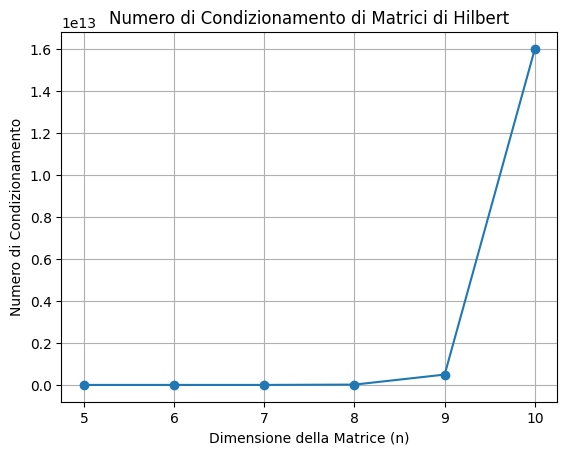

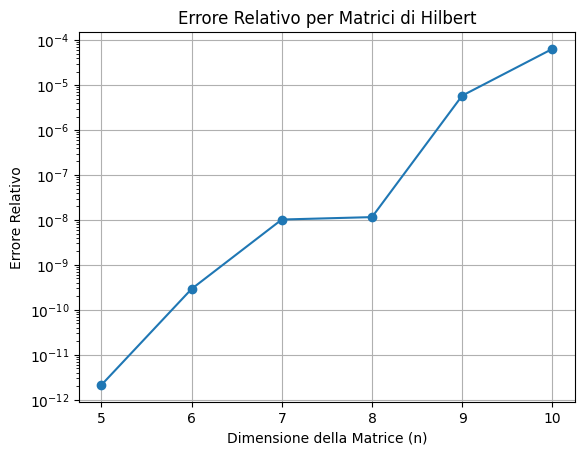

In [9]:
##################################################
##################################################
    
"""Exercise 2.2. 
Si ripeta l’esercizio precedente sulla matrice di Hilbert, che si pu`o generare con la funzione
A = scipy.linalg.hilbert(n) per n = 5, . . . , 10. In particolare:
• Calcolare il numero di condizionamento di A e rappresentarlo in un grafico al variare di n

• Considerare il vettore colonna x = (1, . . . , 1)T , calcola il corrispondente termine noto 
b per il sistema lineare Ax = b e la relativa soluzione x̃ usando la fattorizzazione di Cholesky 
come nel caso precedente.

• Si rappresenti l’errore relativo al variare delle dimensioni della matrice.
NB La decomposizione di Cholesky viene calcolata con la funzione np.linalg.cholesky.
"""
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
from numpy.linalg import cholesky

n_values = range(5, 11)
condition_numbers = np.zeros((6,1))
relative_errors = np.zeros((6,1))

x_exact = np.ones(10)

for n in n_values:
    A = hilbert(n)
    condition_number = np.linalg.cond(A)
    condition_numbers[n-5] = condition_number
    
    x_exact = np.ones(n)  # Vettore x con la dimensione adatta
    
    b = np.dot(A, x_exact)
    
    L = cholesky(A)
    U = L.T  #matrice triangolare superiore
    
    y = np.linalg.solve(L, b)
    x_calculated = np.linalg.solve(U, y)
    
    #err relat
    relative_error = np.linalg.norm(x_exact - x_calculated) / np.linalg.norm(x_exact)
    relative_errors[n-5] = relative_error

plt.figure(1)
plt.plot(n_values, condition_numbers, marker='o')
plt.title('Numero di Condizionamento di Matrici di Hilbert')
plt.xlabel('Dimensione della Matrice (n)')
plt.ylabel('Numero di Condizionamento')
plt.grid(True)

plt.figure(2)
plt.plot(n_values, relative_errors, marker='o')
plt.title('Errore Relativo per Matrici di Hilbert')
plt.xlabel('Dimensione della Matrice (n)')
plt.ylabel('Errore Relativo')
plt.yscale('log')
plt.grid(True)

plt.show()
plt.show()